<div align="center">

# **Assignment 1**

</div>

---

# PyTorch Foundations & Neural Network Inference


---

# 🎯 Objective

The goal of this assignment is to:

* Become comfortable with `torch.Tensor`
* Understand tensor operations and shapes
* Implement a simple linear model (forward pass only)
* Perform inference using a pretrained deep network
* Learn correct model evaluation procedure

This assignment focuses on **understanding computation**, not training.


---

# 📌 General Requirements

* Use **PyTorch**
* Submit a **Jupyter Notebook (.ipynb)**
* Notebook must:
  * Run from top to bottom without errors
  * Contain markdown explanations
  * Include plots where required
* Set random seed
* Use clear variable names

No training loops allowed in this assignment.


---

# Task 1 — Tensor Mechanics (3pts)

### Part A — Basic Operations


1. Create tensors:
   * zeros
   * ones
   * random normal
   * random uniform
2. Perform and demonstrate:
   * elementwise multiplication
   * matrix multiplication
   * broadcasting
   * reshaping
   * transpose
   * concatenation
3. Show examples of incorrect shape operations and explain why they fail.


---

In [1]:
import torch

# =========================
# PART A
# =========================

# 1. Create tensors
tensor_zeros = torch.zeros(10)
tensor_ones = torch.ones(10)
tensor_random_normal = torch.randn(10)
tensor_random_uniform = torch.rand(10)

print("Zeros:\n", tensor_zeros)
print("Ones:\n", tensor_ones)
print("Random normal:\n", tensor_random_normal)
print("Random uniform:\n", tensor_random_uniform, "\n")

# Create matrices for further operations
A = torch.randn(2, 3)
B = torch.randn(2, 3)
C = torch.randn(3, 4)

print("Matrix A:\n", A)
print("Matrix B:\n", B)
print("Matrix C:\n", C, "\n")

# 2. Operations

# Elementwise multiplication
elementwise = A * B
print("Elementwise multiplication A * B:\n", elementwise, "\n")

# Matrix multiplication
matmul = torch.matmul(A, C)
print("Matrix multiplication A @ C:\n", matmul, "\n")

# Broadcasting
vector = torch.randn(3)
broadcast_result = A + vector
print("Broadcasting A + vector:\n", broadcast_result, "\n")

# Reshaping
reshaped = A.reshape(3, 2)
print("Reshaped A (3x2):\n", reshaped, "\n")

# Transpose
transpose = A.T
print("Transpose of A:\n", transpose, "\n")

# Concatenation
concat_dim0 = torch.cat([A, B], dim=0)
concat_dim1 = torch.cat([A, B], dim=1)
print("Concatenation dim=0:\n", concat_dim0)
print("Concatenation dim=1:\n", concat_dim1, "\n")

# 3. Incorrect shape operations

# Example 1 - matrix multiplication shape mismatch
try:
    wrong = torch.matmul(A, B)
except RuntimeError as e:
    print("Matrix multiplication error (A @ B):")
    print(e, "\n")

# Example 2 - incompatible broadcasting
try:
    wrong_broadcast = A + torch.randn(4)
except RuntimeError as e:
    print("Broadcasting error:")
    print(e, "\n")

Zeros:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Ones:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Random normal:
 tensor([-1.3301,  0.3975, -1.4738,  0.4371,  0.3393,  1.5151, -0.7550,  1.9069,
         0.2670, -0.0104])
Random uniform:
 tensor([0.7249, 0.0354, 0.9642, 0.7689, 0.0780, 0.9500, 0.6063, 0.4811, 0.8359,
        0.7120]) 

Matrix A:
 tensor([[ 0.7466, -1.8491, -0.5535],
        [-0.1535,  1.1256,  0.6134]])
Matrix B:
 tensor([[-0.3536,  1.1262, -0.2474],
        [ 0.6255,  0.6906, -1.2391]])
Matrix C:
 tensor([[-0.3603,  0.0772, -0.7646,  1.2080],
        [ 0.9962, -0.9624,  1.7099,  0.3478],
        [-1.5417,  1.3423, -1.6857,  1.0625]]) 

Elementwise multiplication A * B:
 tensor([[-0.2640, -2.0825,  0.1369],
        [-0.0960,  0.7773, -0.7600]]) 

Matrix multiplication A @ C:
 tensor([[-1.2577,  1.0942, -2.7996, -0.3293],
        [ 0.2310, -0.2718,  1.0081,  0.8577]]) 

Broadcasting A + vector:
 tensor([[ 0.9144, -2.7509, -0.4759],
        [ 0.0143,  0.223

### Part B — Manual Linear Algebra

Implement manually (without using `torch.matmul` for part of it):

* Dot product
* Matrix-vector multiplication
* Batch matrix multiplication

Then verify correctness using built-in PyTorch functions.


---

In [2]:
def manual_dot(x, y):
    result = 0.0
    for i in range(len(x)):
        result += x[i] * y[i]
    return result

x = torch.randn(5)
y = torch.randn(5)

manual_result = manual_dot(x, y)
torch_result = torch.dot(x, y)

print("Manual dot:", manual_result)
print("Torch dot:", torch_result)

def manual_matvec(A, v):
    m, n = A.shape
    result = torch.zeros(m)
    for i in range(m):
        for j in range(n):
            result[i] += A[i, j] * v[j]
    return result

A = torch.randn(3, 4)
v = torch.randn(4)

manual_mv = manual_matvec(A, v)
torch_mv = torch.matmul(A, v)

print("Manual matvec:\n", manual_mv)
print("Torch matvec:\n", torch_mv)

def manual_batch_matmul(A, B):
    batch, m, n = A.shape
    _, _, k = B.shape
    
    result = torch.zeros(batch, m, k)
    
    for b in range(batch):
        for i in range(m):
            for j in range(k):
                for t in range(n):
                    result[b, i, j] += A[b, i, t] * B[b, t, j]
    return result

A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)

manual_batch = manual_batch_matmul(A, B)
torch_batch = torch.matmul(A, B)

print("Manual batch matmul:\n", manual_batch)
print("Torch batch matmul:\n", torch_batch)

print("Difference:", torch.norm(manual_batch - torch_batch))

Manual dot: tensor(3.5831)
Torch dot: tensor(3.5831)
Manual matvec:
 tensor([2.4526, 1.2554, 2.9509])
Torch matvec:
 tensor([2.4526, 1.2554, 2.9509])
Manual batch matmul:
 tensor([[[-1.4814, -0.2830,  3.7742, -3.8954,  0.2166],
         [ 0.8828,  2.1781, -2.8473,  5.9586, -1.1841],
         [ 0.8365,  0.3395, -1.7321,  2.8273, -1.1271]],

        [[-1.5879, -1.2219,  1.5100,  0.7409, -2.5555],
         [-3.2889, -3.3847,  1.7331,  0.7391, -7.2744],
         [ 1.2292, -0.9046, -1.5984,  0.0770,  0.8948]]])
Torch batch matmul:
 tensor([[[-1.4814, -0.2830,  3.7742, -3.8954,  0.2166],
         [ 0.8828,  2.1781, -2.8473,  5.9586, -1.1841],
         [ 0.8365,  0.3395, -1.7321,  2.8273, -1.1271]],

        [[-1.5879, -1.2219,  1.5100,  0.7409, -2.5555],
         [-3.2889, -3.3847,  1.7331,  0.7391, -7.2744],
         [ 1.2292, -0.9046, -1.5984,  0.0770,  0.8948]]])
Difference: tensor(0.)


### Required Explanation (Markdown)

Explain:

* Difference between elementwise and matrix multiplication.
* Broadcasting rules in PyTorch.
* Computational complexity of multiplying an n×mn \\times mn×m matrix with an m×km \\times km×k matrix.


---

# TODO:



# Task 2 — Simple Linear Model (Forward Pass Only) (3pts)

We consider the model:

$$
y = Wx+b
$$


---

### Requirements:


1. Generate synthetic dataset:
   * 100 data points
   * 1D input → 1D output
   * Add small Gaussian noise
2. Initialize:
   * `W` randomly
   * `b` randomly
3. Compute:
   * Predictions
   * Mean Squared Error manually
4. Plot:
   * Data points
   * Model predictions


---

### Important Restrictions:

* No `torch.nn.Linear`


---

### Required Explanation:

* What does the weight represent geometrically?
* What does the bias represent?
* Why does random initialization produce poor predictions?


---

W: -0.5671805739402771 b: -0.5706474184989929
Manual MSE: 80.22706604003906


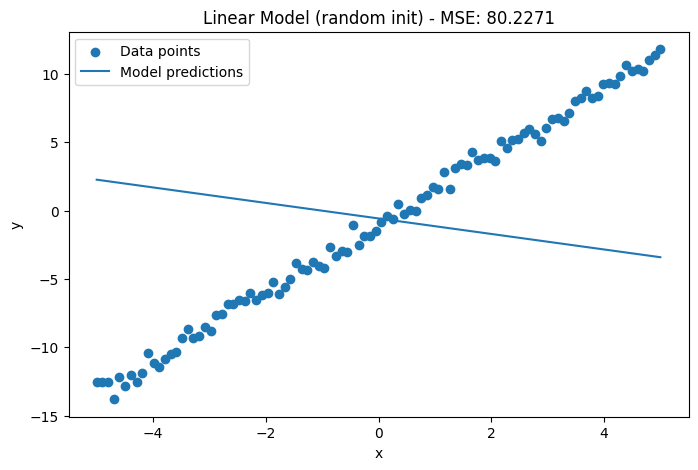

In [3]:
import torch
import matplotlib.pyplot as plt

# 1) Synthetic dataset: 100 points, 1D -> 1D, small Gaussian noise
torch.manual_seed(42)
n = 100
x = torch.linspace(-5, 5, n).unsqueeze(1)  # (100, 1)

true_W = torch.tensor([[2.5]])
true_b = torch.tensor([[-1.0]])
noise = 0.5 * torch.randn(n, 1)
y = x @ true_W + true_b + noise  # y = Wx + b + noise

# 2) Random init W and b
W = torch.randn(1, 1)
b = torch.randn(1)  # broadcast to (100,1) in expression below

# 3) Predictions + manual MSE
y_pred = x @ W + b
mse = ((y_pred - y) ** 2).mean()  # manual MSE (no nn.MSELoss)

print("W:", W.item(), "b:", b.item())
print("Manual MSE:", mse.item())

# 4) Plot points + model prediction line
plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label="Data points")
plt.plot(x.numpy(), y_pred.detach().numpy(), label="Model predictions")
plt.title(f"Linear Model (random init) - MSE: {mse.item():.4f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 🟢 Task 3 — Pretrained Model Inference (4pts)

Now you will use a real deep neural network.


---

### Step 1 — Load Model

* Load pretrained `ResNet18` from `torchvision.models`
* Set `model.eval()`


---

### Step 2 — Image Preprocessing

* Load 3–5 images
* Apply correct transforms:
  * Resize
  * Center crop
  * To tensor
  * Normalization (ImageNet mean/std)


---

### Step 3 — Inference

* Run forward pass
* Extract top-5 predicted classes
* Print class names and probabilities


---

### Step 4 — Experiment

Run inference:


1. With correct normalization
2. Without normalization

Compare results.


---

### Required Explanation

In markdown, answer:


1. Why do we call `model.eval()`?
2. What happens if normalization is skipped?
3. What is a logit?
4. Why do we apply softmax for probabilities?

In [4]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from torchvision.models import ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt

# -------------------------
# Step 1 — Load Model
# -------------------------
weights = ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.eval()

# ImageNet class names (1000 labels)
categories = weights.meta["categories"]

# -------------------------
# Step 2 — Image Preprocessing
# -------------------------
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD  = (0.229, 0.224, 0.225)

transform_correct = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),
])

transform_no_norm = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # brak Normalize
])

# 3–5 images: podaj swoje ścieżki
image_paths = [
    "img1.jpg",
    "img2.jpg",
    "img3.jpg",
    # "img4.jpg",
    # "img5.jpg",
]

def load_batch(paths, tfm):
    imgs = []
    for p in paths:
        img = Image.open(p).convert("RGB")
        imgs.append(tfm(img))
    return torch.stack(imgs, dim=0)  # (N, 3, 224, 224)

def top5_from_logits(logits):
    probs = F.softmax(logits, dim=1)            # (N,1000)
    top_probs, top_idxs = torch.topk(probs, 5)  # (N,5)
    return top_probs, top_idxs

def run_inference(title, tfm):
    batch = load_batch(image_paths, tfm)

    with torch.no_grad():
        logits = model(batch)  # (N, 1000) - to są logity

    top_probs, top_idxs = top5_from_logits(logits)

    print(f"\n===== {title} =====")
    for i, path in enumerate(image_paths):
        print(f"\nImage: {path}")
        for r in range(5):
            cls_idx = top_idxs[i, r].item()
            cls_name = categories[cls_idx]
            prob = top_probs[i, r].item()
            print(f"  Top-{r+1}: {cls_name:25s}  prob={prob:.4f}")

# -------------------------
# Step 3 + Step 4 — Inference + Experiment
# -------------------------
run_inference("WITH correct ImageNet normalization", transform_correct)
run_inference("WITHOUT normalization", transform_no_norm)

# (opcjonalnie) Podgląd obrazów
fig, axes = plt.subplots(1, min(len(image_paths), 5), figsize=(15, 4))
if len(image_paths) == 1:
    axes = [axes]
for ax, p in zip(axes, image_paths[:5]):
    ax.imshow(Image.open(p).convert("RGB"))
    ax.set_title(p)
    ax.axis("off")
plt.show()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\piotr/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100.0%


FileNotFoundError: [Errno 2] No such file or directory: 'img1.jpg'